# Introduction to Correlation and Colocalisation with Python.

## Reading images

Dominic Waithe 2015 (c)

Exercise: See the similarities between the dot-product and correlation. Apply correlation to images to obtain a metric of colocalisation/similarity. Use colocalisation to assess the quality of registration.

We start with two lists of numbers (or two vectors or arrays as they are known). Please find the dot product of the two vectors. The dot product formula is a follows:<img src="dotProduct.png">
In python there is more than one way to find the dot product of two vectors. It can be performed using 'for loops' or through vectorised notation

In [21]:
#This line is very important: (It turns on the inline visuals!)
%pylab inline
a = [2,9,32,12,14,6,9,23,4,5,13,6,7,92,21,45];
b = [7,21,4,2,92,9,9,6,13,12,45,5,6,23,14,32];

#Please calculate the dot product of the vectors 'a' and 'b'.
#You may use any method you like. If get stuck. Check:
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
#If you rearrange the numbers in 'b', what sequence will give
#the highest dot-product magnitude?


Populating the interactive namespace from numpy and matplotlib


## The Pearson's test


Exercise: See the similarities

The above example shows you how two number sequences can be compared with nothing more complicated than by using the dot product. This works as long as the sequences comprise of the same numbers but in a shuffled order.  To compare different sequences with the original we normalise by the magnitude of the vectors. To include this step. We use a more complicated equation:
<img src="eqn_full.gif">

https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
https://en.wikipedia.org/wiki/Cross-correlation

Hopefully you can see the top of this equation is very similar to the dot-product, except that it is centered on zero (subtraction of the mu, the mean) and the variance is normalised (division by standard deviation).

Because the equation is normalised, a perfectly correlated sequence yeilds a rho value of 1.0. A perfectly random comparison yields 0 and two anti-correlated sequences will yield a value of -1.0.


In [54]:
#The cross-correlation algorithm is another name for the Pearson's test.
#Here it is written in code form and utilising the builtin functions:
c = [0,1,2]
d = [3,4,5]
rho = np.average((c-np.average(c))*(d-np.average(d)))/(np.std(c)*np.std(d))
print('rho',np.round(rho,3))
#equally you can write
rho = np.dot(c-np.average(c),d-np.average(d))/sqrt(((np.dot(c-np.average(c),c-np.average(c)))*np.dot(d-np.average(d),d-np.average(d))))
print('rho',round(rho,3))

#Why is the rho for c and d, 1.0?
#Edit the variables c and d and find the pearson's value for 'a' and 'b'.
#What happens when you correlate 'a' with 'a'?

('rho', 1.0)
('rho', 1.0)


('image dimensions', (4, 512, 512), ' im dtype:', dtype('uint8'))


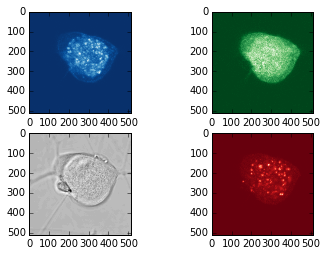

In [23]:
#Here is an image from the Fiji practical
from tifffile import imread as imreadtiff
im = imreadtiff('neuron.tif')
print('image dimensions',im.shape, ' im dtype:',im.dtype)
subplot(2,2,1)
imshow(im[0,:,:],cmap='Blues_r')
subplot(2,2,2)
imshow(im[1,:,:],cmap='Greens_r')
subplot(2,2,3)
imshow(im[2,:,:],cmap='Greys_r')
subplot(2,2,4)
imshow(im[3,:,:],cmap='Reds_r')

## Pearson's comparison of microscopy derived images

In [24]:
a = im[0,:,:].reshape(-1)
b = im[3,:,:].reshape(-1)
#Calculate the pearson's coefficent (rho) for the image channel 0, 3.
#You should hopefully obtain a value 0.829

('shape of im: ', (2, 3, 167, 261), 'bit-depth: ', dtype('uint16'))


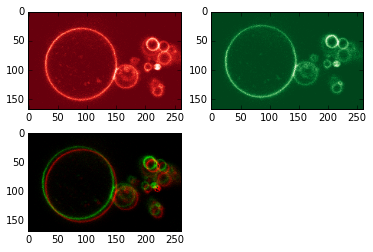

In [53]:
#from tifffile import imread as imreadtiff
im = imreadtiff('composite.tif')

#The organisation of this file is not simple. It is also a 16-bit image.
print("shape of im: ",im.shape,"bit-depth: ",im.dtype)

#We can assess the image data like so.
CH0 = im[0,0,:,:]
CH1 = im[1,0,:,:]

#Single channels visualisation can handle 16-bit
subplot(2,2,1)
imshow(CH0,cmap='Reds_r')
subplot(2,2,2)
imshow(CH1,cmap='Greens_r')
subplot(2,2,3)

#RGB data have to range between 0 and 255 in each channel and be int (8-bit).
imRGB = np.zeros((CH0.shape[0],CH0.shape[1],3))
imRGB[:,:,0] = CH0/255.0
imRGB[:,:,1] = CH1/255.0
imshow((imRGB.astype(np.uint8)))


#What is the current Pearson's value for this image?


# Maybe remove so not to clash with Mark's.

## Last challenge

Exercise: The above image is not registered. Can you devise a way of registering this image using the Pearson's test, as a measure for the similarity of the image in different positions. hint you will need to move one of the images relative to the other and measure the colocalisation in this position. The best localisation will have the highest rho value. Produce an image of your fully registered image.


In [39]:
np.max(imRGB/256.0)

1.0

In [26]:
rho_max = 0
#This moves one of your images with respect to the other.
for c in range(1,40):
    for r in range(1,40):
        #We need to dynamically sample our image.
        temp = CH0[c:-40+c,r:-40+r].reshape(-1);
        #The -40 makes sure they are the same size.
        ref = CH1[:-40,:-40].reshape(-1);
        
        rho = np.dot(temp-np.average(temp),ref-np.average(ref))/sqrt(((np.dot(temp-np.average(temp),temp-np.average(temp)))*np.dot(ref-np.average(ref),ref-np.average(ref))))
        
        #You will need to work out the highest rho value is recorded.
        #You will then need to find the coordinates of this high rho.
        #You will then need to provide a visualisation with the image translated.
        

In [36]:
np.max(imRGB)

256.0

In [49]:
imshow?

In [55]:
whos

Variable     Type        Data/Info
----------------------------------
CH0          ndarray     167x261: 43587 elems, type `uint16`, 87174 bytes
CH1          ndarray     167x261: 43587 elems, type `uint16`, 87174 bytes
a            ndarray     262144: 262144 elems, type `uint8`, 262144 bytes (256 kb)
b            ndarray     262144: 262144 elems, type `uint8`, 262144 bytes (256 kb)
c            list        n=3
c_max        int         5
d            list        n=3
im           ndarray     2x3x167x261: 261522 elems, type `uint16`, 523044 bytes (510 kb)
imRGB        ndarray     167x261x3: 130761 elems, type `float64`, 1046088 bytes (1021 kb)
imreadtiff   function    <function imread at 0x112fe8e60>
r            int         39
r_max        int         5
ref          ndarray     28067: 28067 elems, type `uint16`, 56134 bytes
rho          float64     1.0
rho_max      int         0
temp         ndarray     28067: 28067 elems, type `uint16`, 56134 bytes
